In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def load_data(filename, columns): # Split data 90% training 10% testing.
    df = pd.read_csv(filename, sep=',', usecols = columns, index_col=False)
    
    train_x = np.array(df[columns[0]])[:int(len(df[columns[0]])*0.9)]
    test_x = np.array(df[columns[0]])[-int(len(df[columns[0]])*0.1):]
    train_y = np.array(df[columns[1]])[:int(len(df[columns[1]])*0.9)]
    test_y = np.array(df[columns[1]])[-int(len(df[columns[1]])*0.1):]
    
    return train_x, train_y, test_x, test_y

In [13]:
class SimpleLinearRegression:
    
    def __init__(self, learning_rate = 0.001):
        self.current_weight = 0.1
        self.current_bias = 0.01
        self.learning_rate = learning_rate
        self.costs = []
        self.weights = []
        
    def __cost(self, y, predicted_y): # Mean Squared Error.
        return np.sum(np.square(y - predicted_y)) / len(y)
    
    def __gradient_descent(self, x, y, predicted_y): # Gradient Descent: θ = θ − η ⋅ ∇θJ(θ). 
        weight_derivative = -(2 / len(x)) * sum(x * (y - predicted_y))
        bias_derivative = -(2 / len(x)) * sum(y - predicted_y)
            
        self.current_weight -= self.learning_rate * weight_derivative
        self.current_bias -= self.learning_rate * bias_derivative
            
    def fit(self, x, y, epochs=100): # Training.
        for _ in range(epochs):
            predicted_y = self.current_weight * x + self.current_bias
            cost = self.__cost(y, predicted_y)
            
            self.costs.append(cost)
            self.weights.append(self.current_weight)
            
            self.__gradient_descent(x, y, predicted_y)
            
        print(f'Coefficient of determination for training: {1 - np.sum(np.square(y - predicted_y)) / np.sum(np.square(y))}')
    
    def plot_cost_weight(self): # Weight vs Cost Graph.
        plt.plot(self.weights, self.costs)
        plt.scatter(self.weights, self.costs, marker='o', color='red')
        plt.title('Cost vs Weights')
        plt.ylabel('Cost')
        plt.xlabel('Weight')
        plt.show()
    
    def plot_regression(self, x, y): # Regression Line Graph.
        predicted_y = self.current_weight * x + self.current_bias

        plt.scatter(x, y, marker='o', color='red')
        plt.plot([min(x), max(x)], [min(y), max(y)], color='blue',markerfacecolor='red', markersize=10,linestyle='dashed')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
    
    def test(self, x, y):
        predicted_y = self.current_weight * x + self.current_bias
        print(f'Coefficient of determination for testing: {1 - np.sum(np.square(y - predicted_y)) / np.sum(np.square(y))}')
        
    def predict(self, x):
        return self.current_weight * x + self.current_bias

Coefficient of determination for training: 0.8436239271312199
Coefficient of determination for testing: 0.8943058582327089
Estimated Weight: 0.007121068202702679
Estimated Bias: 0.0037663538113267775


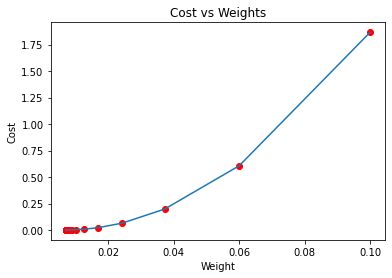

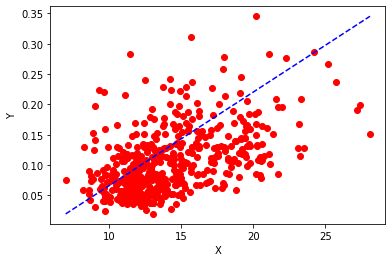

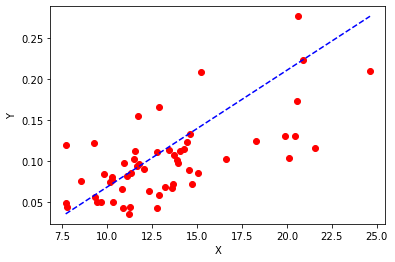

In [14]:
train_x, train_y, test_x, test_y = load_data('data.csv', ['radius_mean', 'compactness_mean'])

nn = SimpleLinearRegression()
nn.fit(train_x, train_y)
nn.test(test_x, test_y)

print(f'Estimated Weight: {nn.current_weight}\nEstimated Bias: {nn.current_bias}')

nn.plot_cost_weight()

nn.plot_regression(train_x, train_y)
nn.plot_regression(test_x, test_y)